In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Librairies spéciales

# 1. Shapely <font color='green'>[Beginner]</font>

## 1.1 Intro
- Shapely est une librairie python permettant de manipuler des objects géométriques planaires.
- Elle est basée sur GEOS, et initialement développée pour rendre possible les opérations PostGIS ne dehors d'une BDD relationnelle.

Shapely manipule trois types d'objets fondamentaux: les points, les courbes et les polygones:

In [2]:
from shapely import geometry

Les points

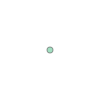

In [3]:
point_0 = geometry.Point(0,0)
point_0

Les courbes fermées ou ouvertes

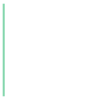

In [4]:
line_01 = geometry.LineString(((0,0),(0,1)))
line_01

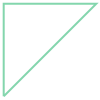

In [5]:
ring_01 = geometry.LinearRing(((0,0),(0,1),(1,1)))
ring_01

Les polygones

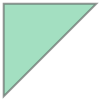

In [6]:
triangle = geometry.Polygon([(0,0),(0,1),(1,1)])
triangle

On peut également avoir des collections d'objets de même type

In [7]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

Quelques remarques:
- Shapely ne gère pas les systèmes de coordonnées
- Shapely ne gère pas le calcul 3D: on peut ajouter une coordonnée z aux objets, mais celle-ci n'aura pas d'impact sur l'analyse, car toutes les opérations sont effectuées dans un même plan (x-y)

## 1.2 Les objets géometriques

### 1.2.1 Tous ont des méthodes et attributs communs:
- une aire --> `area`
- des limites --> `bounds`
- une longueur --> `length`
- un type géométriques --> `geom_type`
- une distance par rapport à d'autres objets --> `distance(object)`

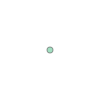

Point
0.0
0.0
(0.0, 0.0, 0.0, 0.0)


0.5

In [8]:
point_0
print(point_0.geom_type)
print(point_0.area)
print(point_0.length)
print(point_0.bounds)
point_0.distance(geometry.Point(0.5, 0))

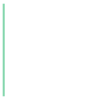

LineString
0.0
1.0
(0.0, 0.0, 0.0, 1.0)


0.5

In [9]:
line_01
print(line_01.geom_type)
print(line_01.area)
print(line_01.length)
print(line_01.bounds)
line_01.distance(geometry.Point(0.5, 0))

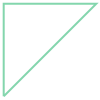

'LinearRing'

0.0

3.414213562373095

(0.0, 0.0, 1.0, 1.0)

0.3535533905932738

In [10]:
ring_01
ring_01.geom_type
ring_01.area
ring_01.length
ring_01.bounds
ring_01.distance(geometry.Point(0.5, 0))

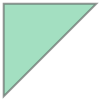

'Polygon'

0.5

3.414213562373095

(0.0, 0.0, 1.0, 1.0)

0.3535533905932738

In [11]:
triangle
triangle.geom_type
triangle.area
triangle.length
triangle.bounds
triangle.distance(geometry.Point(0.5, 0))

### 1.2.2 Construction
- à partir des coordonnées
- à partir d'autres objets géométriques

Point

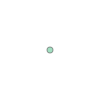

In [12]:
# Creation d'un point à partir de coordonnées
point_01 = geometry.Point([0,1])
point_01

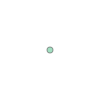

In [13]:
# Creation d'un point à partir d'un objet Point --> on créé ici une copie
geometry.Point(point_0)

In [14]:
# On peut accéder aux coordonnées du point
point_0.coords[:]

[(0.0, 0.0)]

Courbes

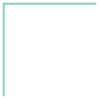

In [15]:
# On peut créer une LineString à partir d'une liste de coordonnées
geometry.LineString([(0, 0), (0, 1) ,(1, 1)])

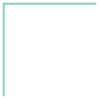

In [16]:
# On peut créer une LineString à partir d'une liste de points
point_11 = geometry.Point((1,1))
line_11 = geometry.LineString([point_0, point_01, point_11])
line_11

In [17]:
line_11.coords[:]

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)]

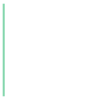

In [18]:
# On peut créer une LineString à partir d'une autre LineString
geometry.LineString(line_01)

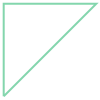

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0)]

In [19]:
# Idem pour les LinearRing
# Restriction: elle ne doit pas s'intersecter
geometry.LinearRing(line_11)
geometry.LinearRing(line_11).coords[:]

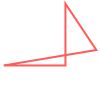

In [20]:
geometry.LinearRing([(0,0), (1,0), (1,1), (1.5, 0.25)])

Polygones

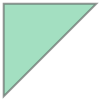

In [21]:
# Un polygone se construit avec les mêmes inputs qu'un LinearRing, mais on peut en plus rajouter des trous
geometry.Polygon(ring_01)

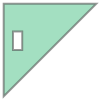

In [22]:
ring_02 = geometry.LinearRing([(0.1, 0.5), (0.1, 0.7), (0.2,0.7), (0.2, 0.5)])
geometry.Polygon(ring_01, holes=[ring_02])

### Application - familiarisation avec la création d'objets shapely

1. Créer 3 points non-alignés
2. Créer une courbe ouverte passant par ces trois points
3. À partir de cette courbe ouverte, créer une courbe fermée
4. Créer un polygone à partir de la courbe fermée obtenue


### 1.2.3 Les méthodes booléennes et relations

Contrôler les géométries:
- is_empty, is_valid

Comparer des géométries:
- equals, almost_equals, contains, crosses, disjoint, intersects, overlaps, touches, within

#### 1.2.3.1 Contrôler les géométries

#### `object.is_empty`

In [23]:
point_0.is_empty
geometry.Point().is_empty

False

True

#### `object.is_valid`

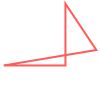

In [24]:
geometry.LinearRing([(0,0), (1,0), (1,1), (1.5, 0.25)])

In [25]:
geometry.LinearRing([(0,0), (1,0), (1,1), (1.5, 0.25)]).is_valid

False

#### 1.2.3.1 Contrôler les géométries

#### `object.equals`

In [26]:
point_0.coords[:]
point_0.equals(point_0)
point_0_copy = geometry.Point(point_0)
point_0.equals(point_0_copy)

[(0.0, 0.0)]

True

True

#### `object.almost_equals`

In [27]:
point_0.coords[:]
point_0.almost_equals(
    geometry.Point((0,0.01)),
    decimal=2  # On peut paramétrer la précision
)

[(0.0, 0.0)]

False

#### `object.contains`

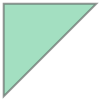

True

In [28]:
triangle
triangle.contains(geometry.Point((0.1,0.2)))

#### `object.crosses`
#### `object.disjoint`
#### `object.intersects`
#### `object.overlaps`
#### `object.touches`
#### `object.within`

### 1.2.4 Les méthodes constructives

#### `object.buffer(radius)`

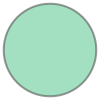

In [29]:
point_0.buffer(1)

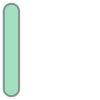

In [30]:
line_01.buffer(0.1)

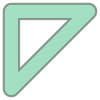

In [31]:
ring_01.buffer(0.1)

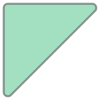

In [32]:
ring_01.buffer(0.1).buffer(-0.05).convex_hull

Remarque : on peut parfois utiliser un buffer nul pour nettoyer une géométrie

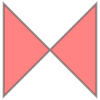

False

In [33]:
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
bowtie = geometry.Polygon(coords)
bowtie
bowtie.is_valid

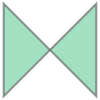

True

'MultiPolygon'

In [34]:
bowtie.buffer(0)
bowtie.buffer(0).is_valid
bowtie.buffer(0).geom_type

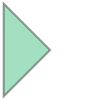

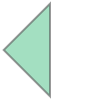

In [35]:
bowtie.buffer(0)[0]
bowtie.buffer(0)[1]

#### `object.convex_hull` 
#### `object.envelope`

### Application


In [36]:
import geopandas as gpd
training_folder = r'../'
gis_folder = training_folder +'gis/'
idf_geodf = gpd.read_file(gis_folder + 'idf/idf_geodf.shp')
polygon1 = idf_geodf.geometry[1]
polygon2 = idf_geodf.geometry[2]

0. Comparer les polygônes : est-ce qu'ils se touchent ? se chevauchent ?
1. À l'aide de la méthode `bounds`, créer un point situé dans le polygône
2. Confirmer avec une méthode que le point créé est bien dans le polygône


## 1.4 Méthodes d'analyse spatiale

#### object.boundary
--> renvoie un objet de dimension inférieure correspondant à la frontière de l'objet

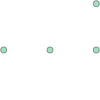

In [37]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = geometry.MultiLineString(coords)
lines.boundary

In [38]:
print(lines.boundary)

MULTIPOINT (-1 0, 0 0, 1 0, 1 1)


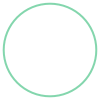

In [39]:
point = geometry.Point([0,0])
point.buffer(10).boundary

In [40]:
point.buffer(10).boundary.geom_type

'LineString'

#### object.centroid
--> renvoie le centroïde de l'objet

In [41]:
center = point.buffer(10).boundary.centroid
center.coords[:]
point.equals(center)
point.almost_equals(center)

[(-1.6969772459820656e-16, 3.96845199711431e-16)]

False

True

In [42]:
lines.centroid.coords[:]

[(0.20710678118654754, 0.20710678118654754)]

#### object.difference(other)

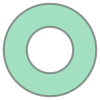

In [43]:
a = geometry.Point(1, 1).buffer(1)
b = geometry.Point(1, 1).buffer(0.5)
a.difference(b)

#### object.intersection(other)

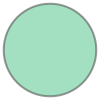

In [44]:
a.intersection(b)

#### object.union(other)

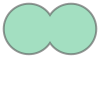

In [45]:
a = geometry.Point(1, 1).buffer(0.6)
b = geometry.Point(2, 1).buffer(0.6)
a.union(b)

### Application
Faire l'union des 4 polygônes suivants

In [46]:
polygon1 = idf_geodf.geometry[1]
polygon2 = idf_geodf.geometry[2]
polygon3 = idf_geodf.geometry[3]
polygon4 = idf_geodf.geometry[4]

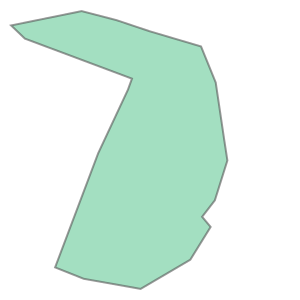

In [47]:
polygon1.union(polygon2).union(polygon3).union(polygon4)

In [48]:
from shapely.ops import cascaded_union

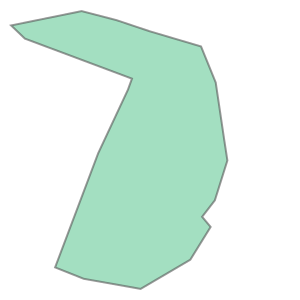

In [49]:
cascaded_union([polygon1, polygon2, polygon3, polygon4])

<GeometryArray>
Length: 20, dtype: geometry

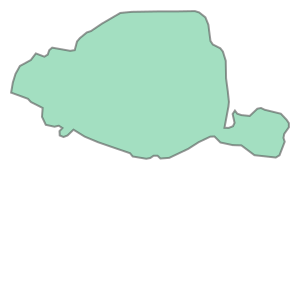

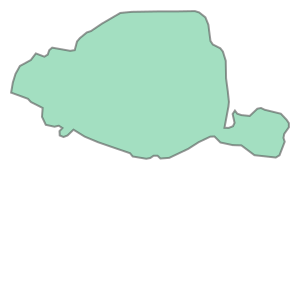

In [50]:
idf_geodf.geometry.values
cascaded_union(idf_geodf.geometry.values)
cascaded_union(list(idf_geodf.geometry.values))